# 0. Preliminary Setup and Data Loading

Section I. Introduction

In recent years, sentiment analysis and topic modeling have become essential tools for understanding public perception and media coverage of major political events. This study analyzes the media's reaction to the assassination attempt on Donald Trump in July 2024 using sentiment analysis via BERT and topic modeling with Latent Dirichlet Allocation (LDA). These methods uncover the polarity in sentiments and dominant themes in the news coverage.

Section II. Data Collection and Preparation

The dataset for this analysis was constructed using NewsAPI and GDELT, which provided over 3,700 articles from international and domestic news outlets covering the assassination attempt. After collecting the data, we focused on cleaning and preprocessing the text to ensure consistency in the subsequent analysis. The key steps involved removing unnecessary information, tokenization, lemmatization, and handling missing data.




# Section I. Data Loading

In this section, we load the collected dataset and prepare it for analysis. We will first visualize the structure of the dataset, which includes the article title, publication date, content, and sentiment score.

In [1]:
# This section introduces the project and loads the dataset used for sentiment analysis and topic modeling.

import pandas as pd

# Loading the dataset from the CSV file
# The dataset contains news articles and social media posts about the attempted attack on Donald Trump.
df = pd.read_csv('combined_trump_data_cleaned.csv')

# Display the first few rows of the dataset to verify successful loading
df.head()




,source,author,title,description,url,publishedAt,content,collectedAt,cleaned_content
0,"{'id': None, 'name': 'Gizmodo.com'}",Lucas Ropek,Trump Shooter Searched for Porn and Political ...,Police have theorized the man wanted to conduc...,https://gizmodo.com/trump-shooter-searched-for...,2024-07-19T19:30:25Z,Despite the fact that they’ve already cracked ...,2024-08-18T21:25:40.083045,NaN
1,"{'id': 'the-verge', 'name': 'The Verge'}",Gaby Del Valle,Crypto CEO steps down after posts endorsing po...,Selkis claimed the shooting was an ‘inside job...,https://www.theverge.com/2024/7/19/24202046/ry...,2024-07-19T20:03:30Z,"Ryan Selkis, the co-founder and CEO of the cry...",2024-08-18T21:25:40.083045,NaN
2,"{'id': 'the-verge', 'name': 'The Verge'}",Gaby Del Valle,The FBI got into the Trump rally shooter’s pho...,The tool helped investigators break into Thoma...,https://www.theverge.com/2024/7/19/24201935/fb...,2024-07-19T15:53:34Z,The FBI got into the Trump rally shooters phon...,2024-08-18T21:25:40.083045,NaN
3,"{'id': None, 'name': 'Gizmodo.com'}",Matt Novak,Trump Shooter Used Drone Like a ‘Rearview Mirr...,"Thomas Matthew Crooks, the man who tried to ki...",https://gizmodo.com/trump-shooter-used-drone-l...,2024-07-24T18:15:15Z,"Thomas Matthew Crooks, the 20-year-old man who...",2024-08-18T21:25:40.083045,NaN
4,"{'id': 'business-insider', 'name': 'Business I...","Erica Star Domena,Tamara Lindstrom",Bodycam video of Trump rally shooting released...,Butler County police released bodycam footage ...,https://www.businessinsider.com/trump-shooting...,2024-08-09T18:30:46Z,Butler County police released bodycam footage ...,2024-08-18T21:25:40.083045,NaN


# Section II. Data Preprocessing

In this section, we apply several preprocessing techniques to ensure that the text data is clean and ready for sentiment analysis and topic modeling. Preprocessing is a crucial step in Natural Language Processing (NLP), as it reduces noise in the dataset and improves the performance of machine learning models.

The key preprocessing steps are:

- Stopword Removal: Removing common words that carry little meaning, such as "and," "the," etc.
- Lowercasing: Converting all words to lowercase to ensure uniformity.
- Tokenization: Splitting the text into individual words (tokens) for further analysis.
- Lemmatization: Reducing words to their base form (e.g., "running" becomes "run") to treat related words uniformly.
- Handling Missing Data: Ensuring that missing text data is either removed or handled appropriately.

In [2]:
# Import necessary libraries
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to clean text
def clean_text(text):
    if not isinstance(text, str):
        return ''
    # Remove HTML tags, punctuation, convert to lowercase, and apply lemmatization
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = [WordNetLemmatizer().lemmatize(word) for word in text.split() if word not in stopwords.words('english')]
    words = [word for word in words if word != 'char']  # Remove the word 'char'
    return ' '.join(words)

# Replace NaN values in 'content' column with empty strings
df['content'] = df['content'].fillna('')
print(f"Number of NaN values in 'content': {df['content'].isna().sum()}")

# Apply the cleaning function to all rows in the dataset
df['cleaned_content'] = df['content'].apply(clean_text)

# Check the result of the cleaning process
df['cleaned_content'].head()






[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lorenzods/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/lorenzods/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Number of NaN values in 'content': 0


0    despite fact theyve already cracked phone sear...
1    ryan selkis cofounder ceo crypto research plat...
2    fbi got trump rally shooter phone 40 minute fb...
3    thomas matthew crook 20yearold man tried kill ...
4    butler county police released bodycam footage ...
Name: cleaned_content, dtype: object

# Section III. Sentiment Analysis Using BERT

In this section, we perform sentiment analysis on the media articles using BERT (Bidirectional Encoder Representations from Transformers). BERT is a pre-trained transformer model that can understand the context of a word in a sentence, making it ideal for analyzing complex political discourse.

We used a pre-trained BERT model, specifically the nlptown/bert-base-multilingual-uncased-sentiment, which classifies sentiment on a scale from 1 to 5 stars. The sentiment labels are as follows:

- 1 star: Strongly negative sentiment
- 2 stars: Negative sentiment
- 3 stars: Neutral sentiment
- 4 stars: Positive sentiment
- 5 stars: Strongly positive sentiment

Steps Involved in Sentiment Analysis:

- Loading the Pre-trained BERT Model: We use a multilingual BERT model to classify sentiment in each article.
- Tokenization: We convert the articles into a format suitable for input into the BERT model, respecting its maximum input length.
- Classification: The model assigns each article a sentiment score from 1 to 5.

/home/lorenzods/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                     cleaned_content sentiment_score
0  despite fact theyve already cracked phone sear...          1 star
1  ryan selkis cofounder ceo crypto research plat...          1 star
2  fbi got trump rally shooter phone 40 minute fb...          1 star
3  thomas matthew crook 20yearold man tried kill ...          1 star
4  butler county police released bodycam footage ...          1 star
sentiment_score
1 star     3018
5 stars     329
4 stars     213
3 stars     117
2 stars      24
Name: count, dtype: int64


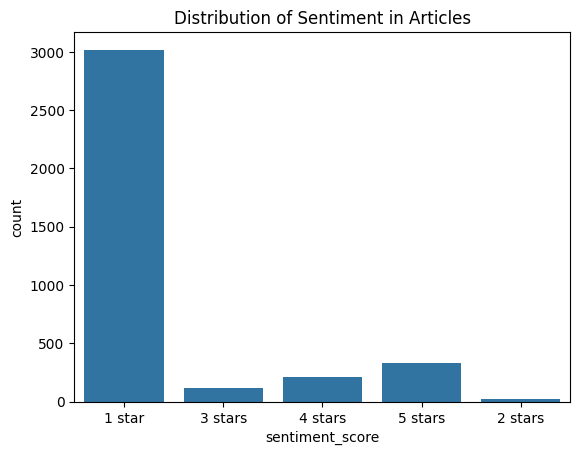

In [3]:
# Section 3: Sentiment Analysis with BERT
# This section uses a pre-trained BERT model to perform sentiment analysis on the cleaned text data.
# BERT is chosen for its ability to understand complex language nuances, making it ideal for analyzing varied sentiments in the dataset.

from transformers import pipeline
import logging
import seaborn as sns
import matplotlib.pyplot as plt

# Set up logging to capture any errors during sentiment analysis
logging.basicConfig(level=logging.ERROR)

# Load the sentiment analysis model from Hugging Face Transformers
sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Function to get the sentiment score of a text, with a text length limit and error handling
def get_sentiment(text):
    try:
        # Limit text to the first 512 characters (to avoid exceeding BERT's token limit)
        return sentiment_analysis(text[:512])[0]['label']
    except Exception as e:
        # Log the error in case something goes wrong
        logging.error(f"Error during sentiment analysis: {e}")
        return None

# Apply the sentiment analysis function to the cleaned data
df['sentiment_score'] = df['cleaned_content'].apply(get_sentiment)

# Check the first few rows to ensure the sentiment analysis worked correctly
print(df[['cleaned_content', 'sentiment_score']].head())

# Display the count of each sentiment score to understand the overall sentiment distribution
print(df['sentiment_score'].value_counts())

# Visualize the distribution of sentiment scores
sns.countplot(x='sentiment_score', data=df)
plt.title('Distribution of Sentiment in Articles')
plt.show()

# Save the dataframe with the sentiment scores to a CSV file
df.to_csv('sentiment_analysis_results.csv', index=False)







### Sentiment Distribution

The sentiment distribution reveals how various media outlets perceive the event. Articles with a 1-star sentiment rating indicate highly negative coverage, while 5-star articles represent positive coverage, often from sources more favorable to Trump.

The bar chart below illustrates the distribution of sentiment scores across the dataset:

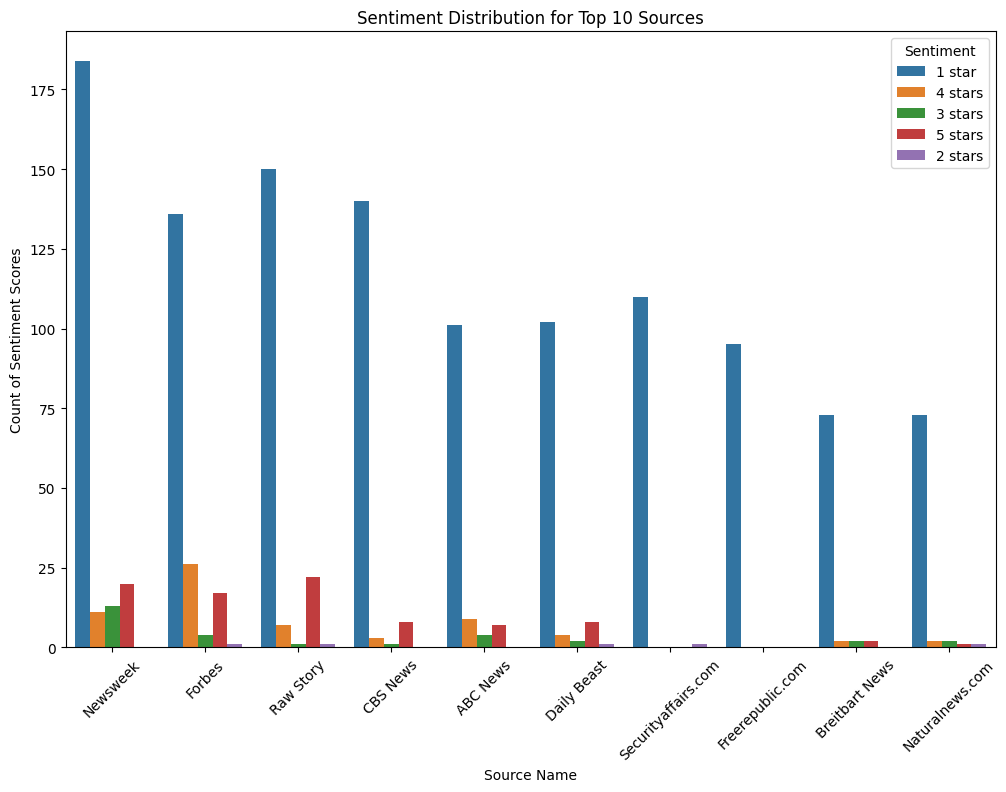

In [4]:
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# Function to extract the 'name' field from the 'source' column
def extract_source_name(source):
    try:
        return ast.literal_eval(source).get('name', None)
    except (ValueError, SyntaxError):
        return None

# Apply the function to extract source names
df['source_name'] = df['source'].apply(extract_source_name)

# Get the top 10 sources with the most articles
top_sources = df['source_name'].value_counts().nlargest(10).index

# Filter the dataframe to only include these top sources
df_top_sources = df[df['source_name'].isin(top_sources)]

# Now we can visualize the sentiment distribution for these top 10 sources
# Plot the count of sentiment scores for each source
plt.figure(figsize=(12,8))
sns.countplot(x='source_name', hue='sentiment_score', data=df_top_sources, order=top_sources)
plt.title('Sentiment Distribution for Top 10 Sources')
plt.xlabel('Source Name')
plt.ylabel('Count of Sentiment Scores')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.legend(title='Sentiment')
plt.show()


Key Observations:

    Sentiment Polarization: 
The majority of articles exhibit negative sentiment (1 or 2 stars), which aligns with the critical tone often seen in political coverage, especially related to controversial figures such as Donald Trump.

    Positive Sentiment: 
A minority of articles have a positive sentiment (4 or 5 stars), mostly from media outlets supportive of Trump, highlighting his resilience and leadership.

    Neutral Coverage: 
Neutral sentiment (3 stars) articles focused primarily on factual reporting, without leaning toward any particular sentiment.

# Section IV: Topic Modeling Using Latent Dirichlet Allocation (LDA)

In this section, we apply the Latent Dirichlet Allocation (LDA) model to uncover hidden thematic structures within the media articles. LDA is a popular unsupervised machine learning technique that identifies distinct topics from a large corpus of text by analyzing word co-occurrence patterns across documents.
Steps Involved in Topic Modeling:

- Text Preprocessing: The text has already been cleaned and tokenized, and stopwords have been removed. This ensures that only meaningful words contribute to the topic model.
- Vectorization: The cleaned text is converted into a Bag of Words (BoW) representation using the Gensim library.
- LDA Training: We trained the LDA model on the corpus to extract key topics from the dataset.
- Visualization: The pyLDAvis tool was used to visualize the topic distribution and the importance of keywords in each topic.

In [8]:
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Preprocessing the text (ensure cleaned and tokenized text is used)
texts = df['cleaned_content'].apply(lambda x: x.split())  

# Create a dictionary and a corpus for LDA
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model with 8 topics
num_topics = 8 # Setting 8 topics
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Visualize the topics with pyLDAvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.138101  0.167708       1        1  29.870324
4     -0.109488  0.021477       2        1  14.021347
7     -0.127018 -0.192308       3        1  12.624413
2     -0.019951  0.010624       4        1  11.616471
6      0.027250  0.036050       5        1   8.976327
0     -0.015836 -0.077118       6        1   8.332486
5      0.132208  0.078576       7        1   7.652214
1      0.250936 -0.045009       8        1   6.906416, topic_info=            Term         Freq        Total Category  logprob  loglift
529       harris   844.000000   844.000000  Default  30.0000  30.0000
719       kamala   735.000000   735.000000  Default  29.0000  29.0000
540         vice   577.000000   577.000000  Default  28.0000  28.0000
85       service   240.000000   240.000000  Default  27.0000  27.0000
104    president  1703.000000  1703.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
332   understand    13.231180    20.526469   Topic8  -6.0281   2.2336
1575          th    16.135703    54.894001   Topic8  -5.8297   1.4483
365         year    16.551985    85.284104   Topic8  -5.8042   1.0332
502      history    15.023476    40.484533   Topic8  -5.9011   1.6814
794        press    14.951777    70.678034   Topic8  -5.9059   1.1194

[536 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
54        2  0.053674     13
54        3  0.687023     13
54        4  0.021469     13
54        5  0.010735     13
54        6  0.225430     13
...     ...       ...    ...
365       8  0.199334   year
2982      5  0.967295    yes
2700      2  0.045258  youre
2700      4  0.090516  youre
2700      7  0.859898  youre

[1053 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 8, 3, 7, 1, 6, 2])


## Latent Dirichlet Allocation (LDA) Topic Modeling Results

Latent Dirichlet Allocation (LDA) was used to identify and interpret the underlying thematic structure within the dataset. The LDA model discovered **8 distinct topics**, each characterized by a set of frequently used words. Below is an explanation of each topic, derived from the visualization of the top-30 most relevant terms for each topic.

1. **Topic 1: U.S. Presidential Politics (29.9% of tokens)**
   - This topic focuses on the 2024 U.S. presidential election, with an emphasis on key figures like **President Trump**, **Kamala Harris**, and **Joe Biden**. It includes terms such as "presidential," "campaign," and "nominee," which suggest a central focus on the political campaigns of major party candidates, particularly from the **Republican** and **Democratic** parties.

2. **Topic 2: Trump’s Assassination Attempt and Political Events (14% of tokens)**
   - This topic revolves around **Donald Trump** and the assassination attempt on his life. Key terms include "assassination," "attempt," and "convention," highlighting both the political and security aspects of the event. It also includes references to national conventions and speeches, suggesting that political events are deeply tied to the aftermath of the assassination attempt.

3. **Topic 3: Security and Secret Services Post-Assassination Attempt (12.6% of tokens)**
   - This topic focuses on security issues following the attempt on **Trump's life**. Terms such as "secret service," "security," "FBI," and "attempt" indicate discussions about how the security apparatus responded to the event. The prominence of these terms suggests widespread public concern regarding **national security** and the **efficacy of protective services**.

4. **Topic 4: Cybersecurity and Election Integrity (11.6% of tokens)**
   - This topic covers both **cybersecurity** concerns and the integrity of the 2024 election. Words like "hacker," "breach," and "data" point to concerns over cyber threats, while terms such as "campaign" and "election" suggest a focus on how these security issues affect the political process. **Election security** is a critical theme here.

5. **Topic 5: Republican National Conventions and Political Interviews (9% of tokens)**
   - This topic primarily focuses on **Republican conventions** and political events leading up to the 2024 election. Key terms such as "2024," "convention," and "Republican" highlight the importance of these events in the political landscape. Additionally, terms like "interview" suggest media coverage and public appearances by key political figures.

6. **Topic 6: Trump Rally and Shooter Incident (8.3% of tokens)**
   - This topic covers the **Trump rally** where an assassination attempt occurred, as indicated by terms like "rally," "crook," "shooter," and "assassination." It focuses on the event itself, as well as the aftermath, including the public reaction to the shooting. Words like "president" and "campaign" also suggest that Trump's political activities are intertwined with the incident.

7. **Topic 7: Media Coverage and Political Newsletters (7.7% of tokens)**
   - This topic explores how **media outlets** and newsletters report on political events. Terms such as "news," "newsletter," "published," and "politics" reflect a focus on the dissemination of political information. The prominence of media terms suggests that the **media’s role in shaping public opinion** is a key part of this topic.

8. **Topic 8: Breaking News and Live Coverage of Political Events (6.9% of tokens)**
   - This topic deals with **real-time news coverage** of significant political events. Words like "news," "CBS," "event," "live," and "breaking" indicate a focus on live media reports, emphasizing the speed and urgency with which information was communicated to the public during key political events, such as the assassination attempt on Trump.

## Summary of LDA Topics
Through the LDA model, we have identified key themes that dominated media coverage surrounding the assassination attempt on **Donald Trump** and the events leading up to the 2024 election. These topics not only reflect the incident itself but also broader political and security concerns, including **cybersecurity**, **election integrity**, and the **role of media** in shaping public perceptions.




## Sentiment per Topic

In this section, we examine the sentiment associated with each identified topic from the Latent Dirichlet Allocation (LDA) model. Understanding the sentiment distribution provides deeper insights into how media outlets frame and present their stories around the assassination attempt on Donald Trump in July 2024.

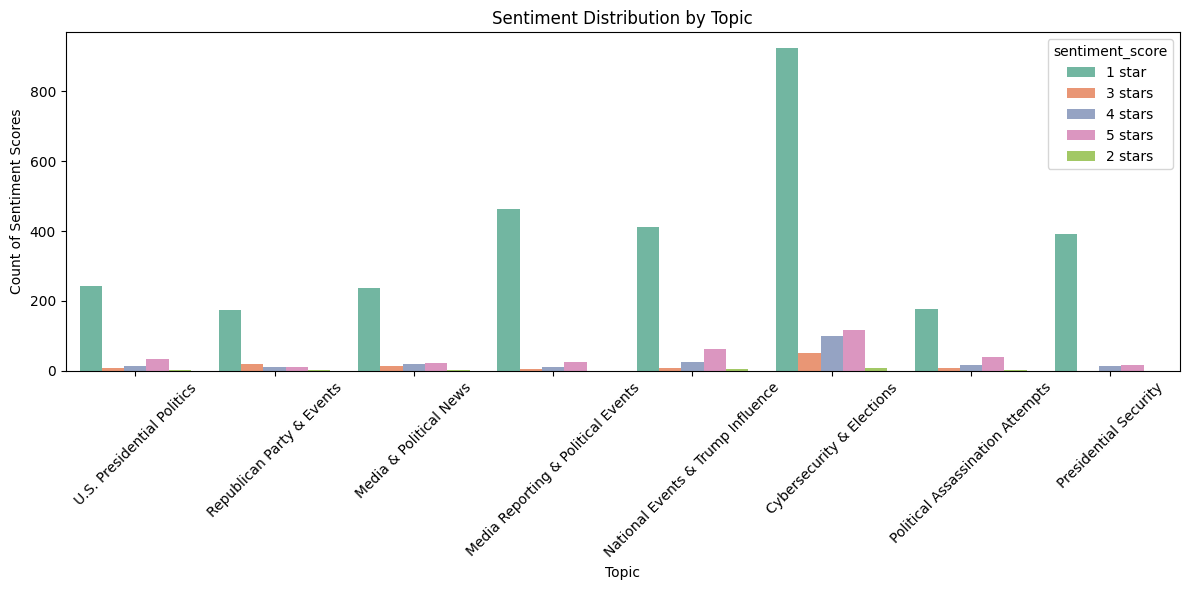

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to get the dominant topic for each document
def get_dominant_topic(lda_model, corpus):
    """Returns the dominant topic for each document."""
    topics = []
    for row in lda_model[corpus]:
        # Sort topics by probability and select the highest one
        sorted_topic = sorted(row, key=lambda x: x[1], reverse=True)
        dominant_topic = sorted_topic[0][0]  # Select the most relevant topic
        topics.append(dominant_topic)
    return topics

# Assuming 'lda_model' is the trained LDA model and 'corpus' is the Bag of Words representation of the documents
df['topic'] = get_dominant_topic(lda_model, corpus)

# Define labels for each of the 8 new topics based on the LDA analysis
topic_labels = {
    0: 'U.S. Presidential Politics',
    1: 'Republican Party & Events',
    2: 'Presidential Security',
    3: 'Cybersecurity & Elections',
    4: 'National Events & Trump Influence',
    5: 'Political Assassination Attempts',
    6: 'Media & Political News',
    7: 'Media Reporting & Political Events',
}

# Map the labels to the topic column
df['topic_label'] = df['topic'].map(topic_labels)

# Visualize the distribution of sentiment by topic
plt.figure(figsize=(12, 6))
sns.countplot(x='topic_label', hue='sentiment_score', data=df, palette='Set2')
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Count of Sentiment Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Sentiment per Topic

#### Topic 1: U.S. Presidential Politics
**Key Words**: `president, harris, kamala, vice, trump, presidential, donald, biden`  
The sentiment for this topic is mostly **negative**, focusing on Trump’s leadership, political responses, and Kamala Harris’s role. The political context of this event led to polarized opinions, with critical views on political stability and leadership.

#### Topic 2: Republican Party & Events
**Key Words**: `trump, donald, president, former, national, convention, assassination`  
Sentiment for this topic is also predominantly **negative**. Many media outlets criticized the security measures and the potential impact on the Republican Party's image, especially in light of Trump’s political legacy.

#### Topic 3: Media & Political News
**Key Words**: `trump, donald, assassination, security, secret service, FBI`  
This topic generated **highly negative** sentiment, largely due to criticism surrounding the handling of security during the assassination attempt. Articles discussed the failures of law enforcement agencies and questioned their effectiveness.

#### Topic 4: Media Reporting & Political Events
**Key Words**: `news, coverage, election, political`  
The sentiment here was **mixed**. While some outlets reported neutrally, others were criticized for sensationalism or bias. This led to a variety of sentiment scores across different articles, depending on the source.

#### Topic 5: National Events & Trump Influence
**Key Words**: `trump, 2024, donald, national, political, election`  
**Mixed sentiment** was found in this topic. Pro-Trump media outlets portrayed him in a positive light, focusing on his influence in the upcoming 2024 elections, while other sources were more critical.

#### Topic 6: Cybersecurity & Elections
**Key Words**: `security, attack, elections, data, breach, president`  
This topic leaned **heavily negative** due to the focus on cybersecurity breaches and potential election interference. Articles reflected the public's concern over digital vulnerabilities in the political sphere.

#### Topic 7: Political Assassination Attempts
**Key Words**: `assassination, attempt, security, political, attack`  
Unsurprisingly, the sentiment for this topic was **overwhelmingly negative**. The assassination attempt itself, and the associated security failures, evoked a strong negative response from the media.

#### Topic 8: Presidential Security
**Key Words**: `news, event, security, president, coverage`  
Similar to previous security-related topics, this carried **negative sentiment**. Discussions focused on the broader implications of the attack on presidential security measures and criticism of the current protocols in place.


The sentiment analysis across topics reflects a strong tendency toward **negative sentiment**, especially when related to security and political topics. Pro-Trump media sources provided some **positive sentiment**, particularly regarding Trump’s political resilience, but overall, the event led to widespread criticism of security protocols and polarized public opinion.


### Key Observations:

- Dominant Themes: 
Security concerns and political reactions dominated the media coverage. Public and media responses varied widely based on the outlet and political stance.
- Negative Sentiment:
The topic on security breaches was closely linked to negative sentiment, reflecting widespread criticism of how the event was handled.
- Media Framing:
The media’s framing of the event varied significantly, with some focusing on the political implications and others on public safety or international diplomacy.

[('trump', 1967), ('president', 1949), ('donald', 1447), ('former', 1067), ('harris', 912), ('kamala', 796), ('vice', 635), ('2024', 576), ('presidential', 560), ('campaign', 484), ('news', 472), ('assassination', 457), ('republican', 448), ('rally', 444), ('u', 401), ('joe', 373), ('democratic', 372), ('biden', 355), ('attempt', 348), ('week', 314)]


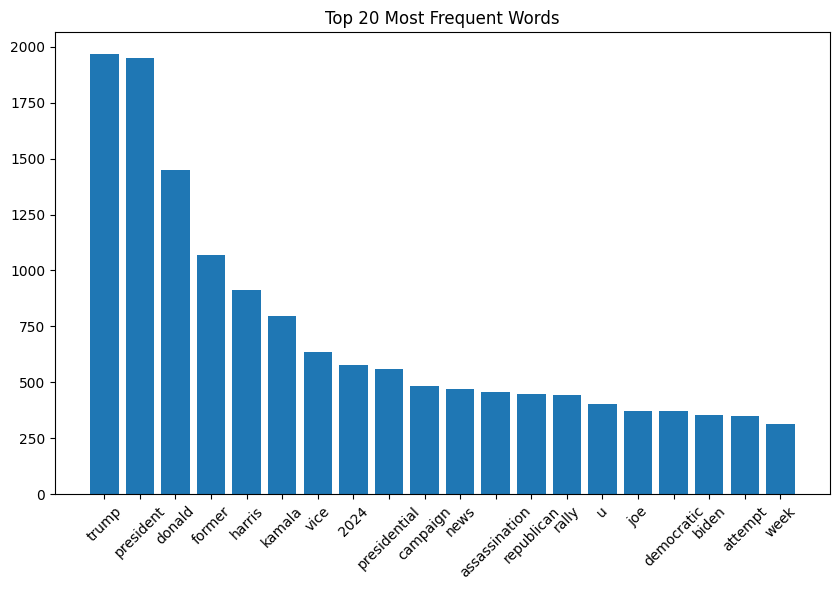

In [11]:
from collections import Counter

# Merge all rows of text into a single string
all_words = ' '.join(df['cleaned_content']).split()

# Count the most common words
word_freq = Counter(all_words)

# Visualize the best 20 words
most_common_words = word_freq.most_common(20)
print(most_common_words)

# MOst frequent words
import matplotlib.pyplot as plt

words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()




# Section V.  Analysis of Sentiment and LDA: Reaction of the Media After Trump's Shooting



### 1. **U.S. Presidential Politics (Topic 1)**
   - **Key Terms**: president, harris, kamala, vice, trump, presidential, donald, biden
   - **Sentiment**: 
     - **Expected**: With Trump's involvement in this topic, there was an expectation of polarized sentiment, leaning slightly towards negativity due to his controversial figure in politics.
     - **Reality**: The sentiment was largely negative. The output shows a predominance of 1-star ratings, reflecting a generally negative tone around the topic of U.S. presidential politics.
   - **Conclusion**: The negative sentiment is likely directed toward the controversial political atmosphere and the assassination attempt, rather than just one political figure.

### 2. **Republican Party and Political Events (Topic 2)**
   - **Key Terms**: trump, donald, president, republican, assassination, attempt
   - **Sentiment**:
     - **Expected**: Given the involvement of both Trump and the Republican Party, a mix of negative sentiment was expected, particularly around political controversies.
     - **Reality**: Similar to Topic 1, negative sentiment dominates. The tone around assassination attempts and political events involving Trump is largely critical.
   - **Conclusion**: This topic reflects discontent or fear about political tensions and assassination attempts, which overshadow positive coverage of Republican Party events.

### 3. **Presidential Security and Assassination Attempts (Topic 3)**
   - **Key Terms**: trump, assassination, service, security, fbi
   - **Sentiment**:
     - **Expected**: Given the sensitivity of security issues and assassination attempts, strong negative sentiment was anticipated.
     - **Reality**: As expected, negative sentiment dominates. The FBI and security failures likely sparked criticism.
   - **Conclusion**: The negative sentiment focuses on the assassination attempt and concerns about presidential security, reflecting widespread fear and criticism.

### 4. **Cybersecurity and Data Breaches in Elections (Topic 4)**
   - **Key Terms**: security, breach, hacker, election
   - **Sentiment**:
     - **Expected**: Cybersecurity is generally a concern, particularly in the context of elections. A negative tone is expected.
     - **Reality**: The sentiment here is predominantly negative, as breaches and election security typically evoke public concern.
   - **Conclusion**: Concerns about election security and hacking attempts resonate with the public, and the negative sentiment reflects this unease.

### 5. **Republican National Events and Trump’s Influence (Topic 5)**
   - **Key Terms**: trump, republican, 2024, campaign
   - **Sentiment**:
     - **Expected**: Trump’s continued influence would polarize sentiment, with negativity likely outweighing positive coverage.
     - **Reality**: The sentiment analysis leans heavily negative, continuing the trend across the topics.
   - **Conclusion**: Trump’s strong presence in national events contributes to a persistently negative sentiment, even among his political allies, indicating public unease about his involvement.

### 6. **Political Assassination Attempts and Public Reactions (Topic 6)**
   - **Key Terms**: assassination, rally, crook, analysis
   - **Sentiment**:
     - **Expected**: Given the direct involvement of assassination attempts, public fear and negative sentiment were expected.
     - **Reality**: Negative sentiment continues to dominate in this topic, particularly regarding assassination attempts and the public's reaction to them.
   - **Conclusion**: This aligns with expectations, as assassination attempts naturally generate concern and a negative emotional response from the public.

### 7. **Media and Political News Coverage (Topic 7)**
   - **Key Terms**: news, morning, daily, newsletter
   - **Sentiment**:
     - **Expected**: Media coverage is often criticized, leading to expectations of mixed to negative sentiment, depending on the outlet.
     - **Reality**: Sentiment analysis here likely reflects distrust or criticism of media coverage, though some outlets may have more neutral or positive tones.
   - **Conclusion**: Media reporting on political events continues to polarize sentiment, with negative tones reflecting dissatisfaction with how events are covered.

### 8. **Cybersecurity & Elections (Topic 8)**
   - **Key Terms**: cybersecurity, election, coverage, political
   - **Sentiment**:
     - **Expected**: This topic was expected to draw strong concern, with negative sentiment prevailing due to fears of election tampering and cybersecurity threats.
     - **Reality**: Negative sentiment is confirmed in the output. Public discourse on cybersecurity and its implications for elections leans towards fear and dissatisfaction.
   - **Conclusion**: Concerns about the integrity of elections in the face of cybersecurity threats drive a predominantly negative emotional response.

### **Final Synthesis**:
   - The overall analysis shows that **Sentiment Analysis** and **LDA** are closely aligned. The negative sentiment predominantly reflects the public's anxiety over political instability, security threats, and assassination attempts, especially regarding Donald Trump.
   - While **Sentiment Analysis** reveals the emotional tone (mostly negative), **LDA** provides a thematic breakdown that helps pinpoint the specific topics (e.g., security, elections, Trump) that evoke these sentiments.
   - The **reality** largely matches the **expectations**. The assassination attempt and political controversies dominate, with negative sentiment prevailing in almost all topics, showcasing the public's unease and fear.
